<a href="https://colab.research.google.com/github/wp225/sklearn/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
od.download('https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset')

Skipping, found downloaded files in "./cars-purchase-decision-dataset" (use force=True to force download)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/cars-purchase-decision-dataset/car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
df=df.replace(to_replace=['Male','Female'],value=['1','0'])
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


In [ ]:
df=df.drop('User ID',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('Purchased',axis=1)
y=df['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               random_state=11,
                                               stratify=y,
                                               shuffle=True)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AnnualSalary'}>]], dtype=object)

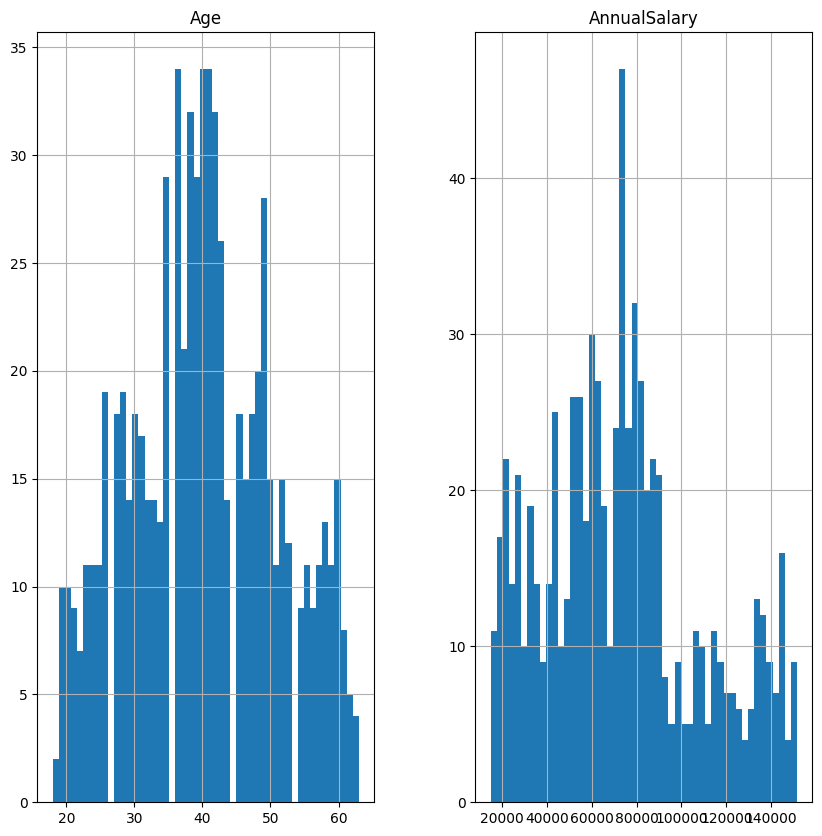

In [ ]:
X_train.hist(bins=50,figsize=[10,10])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4,weights='distance')
model.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
n_neighbours=[]
accuracy_train=[]
accuracy_test=[]
for i in range(1,50,2):
  model_=KNeighborsClassifier(n_neighbors=i,weights='distance')
  model_.fit(X_train_std,y_train)
  accuracy_train.append(accuracy_score(y_train,model_.predict(X_train_std)))
  accuracy_test.append(accuracy_score(y_test,model_.predict(X_test_std)))
  n_neighbours.append(i)


  

<function matplotlib.pyplot.show(close=None, block=None)>

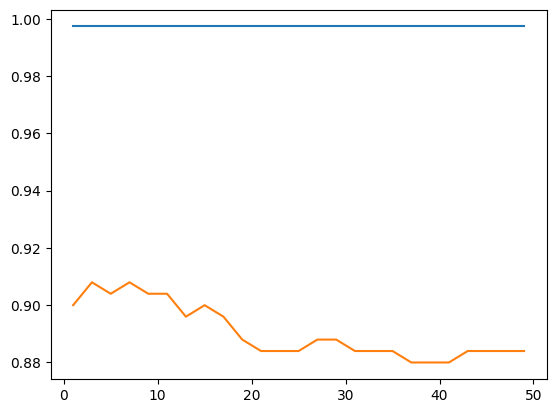

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_neighbours,accuracy_train)
plt.plot(n_neighbours,accuracy_test)
plt.show

As KNN is instance based